<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

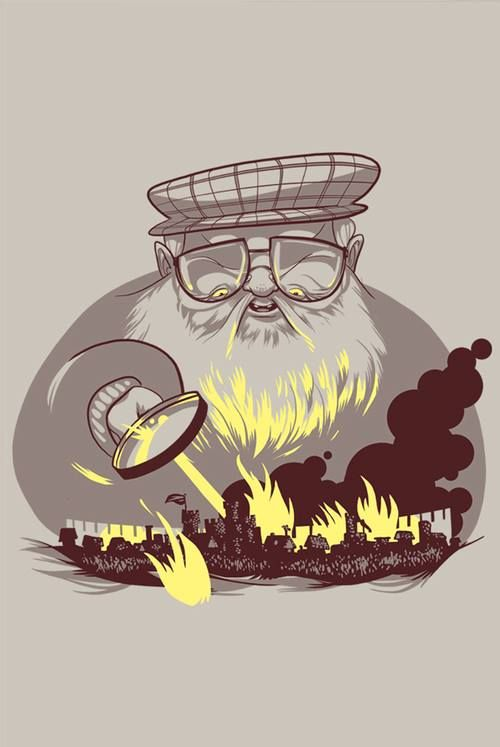

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 63.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 76.5MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
!pip uninstall -y scikit-learn # удалим более старую версию библиотеки
!pip install scikit-learn # установим версию поновее
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)


**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
df = pd.read_csv("/content/game_of_thrones_train.csv")

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).




**Пункты 1.3, 1.4, 1.5, 1.6, 1.7, 1.8 объединены здесь ниже. Следом идет п.1.9**
цуа


In [ ]:
# # Анализ признака popularity

# # Гистограмма
# plt.hist(df["popularity"].dropna(), bins=20, edgecolor="black")
# plt.xlabel("Popularity")
# plt.ylabel("Count")
# plt.title("Distribution of Popularity")
# plt.show()

# # Квантильные значения
# print(df["popularity"].describe())
# print(df["popularity"].quantile([0.25, 0.5, 0.75, 0.9]))

count    1557.000000
mean        0.062400
std         0.121416
min         0.000000
25%         0.013378
50%         0.023411
75%         0.063545
max         1.000000
Name: popularity, dtype: float64
0.25    0.013378
0.50    0.023411
0.75    0.063545
0.90    0.137124
Name: popularity, dtype: float64


In [ ]:
# from scipy.stats import pointbiserialr
# correlation, p_value = pointbiserialr(df["popularity"].dropna(), df["isAlive"].dropna())
# print(f"Point-Biserial Correlation: {correlation:.4f}, p-value: {p_value:.4f}")

Point-Biserial Correlation: -0.1942, p-value: 0.0000


In [ ]:
# from scipy.stats import spearmanr
# correlation, p_value = spearmanr(df["popularity"], df["isAlive"])
# print(f"Spearman Correlation: {correlation:.4f}, p-value: {p_value:.4f}")

Spearman Correlation: -0.2315, p-value: 0.0000


In [ ]:
# Создаем бинарный признак isPopular
df["isPopular"] = (df["popularity"] >= df["popularity"].quantile(0.75)).astype(int)
df.drop(columns=['popularity'], inplace=True)

In [ ]:
# Создаем бинарный признак boolDeadRelations
df["boolDeadRelations"] = (df["numDeadRelations"] > 0).astype(int)
df.drop(columns=['numDeadRelations'], inplace=True)

In [ ]:
# Датасет актуален на 305 год(гипотеза_305: у кого age_sum < 305, тот мертв, а у кого >= 305 тот жив)
df["age_sum"] = df["dateOfBirth"] + df["age"]

In [ ]:
# Пробуем проверить гипотезу_305

# Отбираем "в лоб" строки(там выводится их количество) и проверяем все ли строки датасета попали в выбоку.
# df.loc[(df.age_sum < 305) & (df.isAlive == 0)] # 90-строк
# df.loc[(df.age_sum >= 305) & (df.isAlive == 1)] # 189-строк

In [ ]:
# age_sum_groups = pd.cut(df["age_sum"], bins=[0, 250, 280, 300, 305, 320], labels=["<250", "250-280", "280-300", "300-305", "305+"])

# # Выводим среднюю выживаемость по категориям age_sum
# survival_rates = pd.crosstab(age_sum_groups, df["isAlive"]).apply(lambda x: x / x.sum(), axis=1)
# print(survival_rates)

isAlive    0    1
age_sum          
<250     1.0  0.0
250-280  1.0  0.0
280-300  1.0  0.0
300-305  0.0  1.0


In [ ]:
# Гипотеза_305 подтверждена. Все, кто не дожил до 305 году мертвы, а все кто старше - живы. Работаем с признаком age_sum.

In [ ]:
# Анализируем корреляцию age_sum и age(т.к. есть гипотеза, что они коррелируют и нам стоит оставить более значимую)


# from scipy.stats import pointbiserialr

# # Выбираем только те строки, где age_sum и age оба не NaN
# df_filtered = df[df["age_sum"].notna() & df["age"].notna()]

# # Теперь можно вычислить корреляцию
# corr_age_sum, p_value_age_sum = pointbiserialr(df_filtered["age_sum"], df_filtered["isAlive"])
# print(f"Correlation between age_sum and isAlive: {corr_age_sum:.4f}, p-value: {p_value_age_sum:.4f}")

# corr_age, p_value_age = pointbiserialr(df_filtered["age"], df_filtered["isAlive"])
# print(f"Correlation between age and isAlive: {corr_age:.4f}, p-value: {p_value_age:.4f}")


Correlation between age_sum and isAlive: 0.6030, p-value: 0.0000
Correlation between age and isAlive: -0.3111, p-value: 0.0000


In [ ]:
# Корреляция между age_sum и isAlive: 0.6030, с p-value 0.0000. Это говорит о том, что существует положительная корреляция между суммой возраста и года
# рождения и целевой метрикой (жив или мертв). Высокая корреляция (0.6) указывает на значительное влияние этого признака.
# Корреляция между age и isAlive: -0.3111, с p-value 0.0000. Это отрицательная корреляция, которая говорит о том, что чем старше персонаж, тем с большей
# вероятностью он мертв. Значение -0.31 также указывает на умеренную связь.
# По итогу, оставим age_sum(колонку ещё нужно заполнить).

In [ ]:
# Рассчет даты рождения

median_dateOfBirth = df['dateOfBirth'].median()
print(f"Медианная дата рождения: {median_dateOfBirth}")

# mean_dateOfBirth= df['dateOfBirth'].mean()
# # mean_dateOfBirth_rounded = round(mean_dateOfBirth)
# print(f"Средняя дата рождения: {mean_dateOfBirth}")


Медианная дата рождения: 272.0


In [ ]:
# Заполняем дату рождения

df['dateOfBirth'] = df['dateOfBirth'].fillna(median_dateOfBirth) # Заполняем медианным значением


# #  СЛУЧАЙНОЕ РЯДОМ С МЕДИАНОЙ
# # Генерируем случайные целые числа в диапазоне от median_dateOfBirth - 5 до median_dateOfBirth + 5
# random_noise_rounded = np.random.randint(-5, 6, size=df['dateOfBirth'].isnull().sum())  # от -5 до +5 (включая 5)
# # Заполняем пропущенные значения в dateOfBirth с добавлением случайности
# df.loc[df['dateOfBirth'].isnull(), 'dateOfBirth'] = median_dateOfBirth + random_noise_rounded

In [ ]:
# Рассчет возраста

# Без доп.разрезов
median_age = df['age'].median()
print(f"Медианный возраст: {median_age}")
mean_age = df['age'].mean()
# mean_age_rounded = round(mean_age)
print(f"Средний возраст: {mean_age}")
print("")

# Разрез по полу
median_male = df.loc[df['male'] == 1, 'age'].median()
print(f"Мужчины — медианный возраст: {median_male}")
median_female = df.loc[df['male'] == 0, 'age'].median()
print(f"Женщины — медианный возраст: {median_female}")
print("")

# Разрез по полу и знатности
median_male_noble = df.loc[(df['male'] == 1) & (df['isNoble'] == 1), 'age'].median()
print(f"Мужчины-знатные — медианный возраст: {median_male_noble}")
median_male_non_noble = df.loc[(df['male'] == 1) & (df['isNoble'] == 0), 'age'].median()
print(f"Мужчины-незнатные — медианный возраст: {median_male_non_noble}")
median_female_noble = df.loc[(df['male'] == 0) & (df['isNoble'] == 1), 'age'].median()
print(f"Женщины-знатные — медианный возраст: {median_female_noble}")
median_female_non_noble = df.loc[(df['male'] == 0) & (df['isNoble'] == 0), 'age'].median()
print(f"Женщины-незнатные — медианный возраст: {median_female_non_noble}")


Медианный возраст: 24.0
Средний возраст: 35.29032258064516

Мужчины — медианный возраст: 30.0
Женщины — медианный возраст: 21.0

Мужчины-знатные — медианный возраст: 42.0
Мужчины-незнатные — медианный возраст: 19.0
Женщины-знатные — медианный возраст: 35.0
Женщины-незнатные — медианный возраст: 19.0


In [ ]:
# Заполняем пропуски в 'age'

# Без доп.разрезов
df.loc[(df['age'].isna()), 'age'] = median_age

# # Разрез по полу
# df.loc[(df['male'] == 1) & (df['age'].isna()), 'age'] = median_male
# df.loc[(df['male'] == 0) & (df['age'].isna()), 'age'] = median_female

# # Разрез по полу и знатности
# df.loc[(df['male'] == 1) & (df['isNoble'] == 1) & (df['age'].isna()), 'age'] = median_male_noble
# df.loc[(df['male'] == 1) & (df['isNoble'] == 0) & (df['age'].isna()), 'age'] = median_male_non_noble
# df.loc[(df['male'] == 0) & (df['isNoble'] == 1) & (df['age'].isna()), 'age'] = median_female_noble
# df.loc[(df['male'] == 0) & (df['isNoble'] == 0) & (df['age'].isna()), 'age'] = median_female_non_noble

In [ ]:
# Заполняем NaN в age_sum
df.loc[df['age_sum'].isnull(), 'age_sum'] = df['age'] + df['dateOfBirth']

In [ ]:
# Колонки больше не нужны
df.drop(columns=['age'], inplace=True)
df.drop(columns=['dateOfBirth'], inplace=True)

In [ ]:
# Дома


# Я создаю новую колонку new_house, т.к. у меня была идея вычленить дом из фамилии персонажей и как-то это использовать. В результате новая колонка осталась, а от той идеи я отказался
df['new_house'] = df['house']

# Убираем House и пробелы слева и справа
df['new_house'] = df['new_house'].str.replace(r'^House\s+', '', regex=True).str.strip()

In [ ]:
df.drop(columns=['house'], inplace=True)

In [ ]:
# Заполним пустые значения
df['new_house'].fillna('Unknown', inplace=True)

<ipython-input-176-dacbc7970450>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['new_house'].fillna('Unknown', inplace=True)


In [ ]:
# Идея: классифицировать дома по выживаемости

# Вычисляем вероятность выживания для каждого дома
house_survival = df.groupby("new_house")["isAlive"].mean()

# Классифицируем дома на 10 классов по квантилям
house_survival_classified = pd.cut(house_survival, bins=10, labels=[f'Class {i+1}' for i in range(10)])
# house_survival_classified = pd.cut(house_survival, bins=30, labels=[f'Class {i+1}' for i in range(30)])


#Создаем мапу (словарь) для классов выживания
house_class_map = house_survival_classified.to_dict()

#Создаем новую колонку 'house_class' в df, заполняем ее значениями из мапы
df['house_class'] = df['new_house'].map(house_class_map)

In [ ]:
# Кодируем классы домов
df = pd.get_dummies(df, columns=['house_class'], drop_first=True)  # One-Hot Encoding

In [ ]:
# Удаляем колонку с названиями домов уже не нужно
df.drop(columns=['new_house'], inplace=True)

In [ ]:
# Анализируем Title (в последствии - я его удалил)

# # Категоризация title (One_hot_encoding)
# df["title_ser"] = (df["title"] == "Ser").astype(int)
# df["title_noble"] = ((df["title"].notna()) & (df["title"] != "Ser")).astype(int)
# df["title_servant"] = df["title"].isna().astype(int)
# print(df[["title", "title_ser", "title_noble", "title_servant"]].head(10))

In [ ]:
# # Вычисляем корреляцию между категориальными признаками и целевым признаком isAlive
# correlation_ser = df['title_ser'].corr(df['isAlive'])
# correlation_noble = df['title_noble'].corr(df['isAlive'])
# correlation_servant = df['title_servant'].corr(df['isAlive'])

# # Выводим результаты
# print(f"Корреляция между title_ser и isAlive: {correlation_ser}")
# print(f"Корреляция между title_noble и isAlive: {correlation_noble}")
# print(f"Корреляция между title_servant и isAlive: {correlation_servant}")

Корреляция между title_ser и isAlive: -0.0046565324026667035
Корреляция между title_noble и isAlive: -0.059400185866556834
Корреляция между title_servant и isAlive: 0.05624170591090577


In [ ]:
# # Удаляем из-за слишком слабой корреляцией с целевой метрикой
# df.drop(columns=['title_ser'], inplace=True)
# df.drop(columns=['title_noble'], inplace=True)
# df.drop(columns=['title_servant'], inplace=True)

In [ ]:
df.drop(columns=['title'], inplace=True)

In [ ]:
# Анализ социальной группы персонажа(колонка 'culture')

# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def map_culture(value):
    if pd.isna(value):
        return np.nan
    low_value = value.lower()  # Приводим к нижнему регистру для поиска
    for key, values in cult.items():
        if low_value in values:
            return key  # Возвращаем название кластера, если нашли совпадение
    return value

# Создаем новую колонку и заполняем ее, используя подсказку
df["new_culture"] = df["culture"].apply(map_culture)

In [ ]:
# Заполним пустые значения
df['new_culture'].fillna('Unknown', inplace=True)

<ipython-input-182-8919ca569663>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['new_culture'].fillna('Unknown', inplace=True)


In [ ]:
df.drop(columns=['culture'], inplace=True)

In [ ]:
#  Классифицируем социальные группы(как и дома по выживаемости)

# Вычисляем вероятность выживания для каждого дома
culture_survival = df.groupby("new_culture")["isAlive"].mean()

# Классифицируем соц.группы на 5 классов по квантилям
culture_survival_classified = pd.cut(culture_survival, bins=5, labels=[f'Class {i+1}' for i in range(5)])

# Создаем мапу (словарь) для классов выживания
culture_class_map = culture_survival_classified.to_dict()

# Создаем новую колонку 'culture_class' в df, заполняем ее значениями из мапы
df['culture_class'] = df['new_culture'].map(culture_class_map)

# # Проверка результата
print(df[[ 'new_culture', 'culture_class']].head())

  new_culture culture_class
0     Unknown       Class 4
1    Rivermen       Class 4
2     Unknown       Class 4
3     Unknown       Class 4
4     Dornish       Class 5


In [ ]:
df.drop(columns=['new_culture'], inplace=True) # Уже не нужная

In [ ]:
# Кодируем классы соц.групп
df = pd.get_dummies(df, columns=['culture_class'])  # One-Hot Encoding

In [ ]:
# Удаляем лишние колонки

# Оказалась неинформативно
df.drop(columns=['spouse'], inplace=True)

# эти не нужны
df.drop(columns=['S.No'], inplace=True)
df.drop(columns=['name'], inplace=True)

# очень неинформативно
df.drop(columns=['mother'], inplace=True)
df.drop(columns=['father'], inplace=True)
df.drop(columns=['heir'], inplace=True)

# очень неинформативно
df.drop(columns=['isAliveMother'], inplace=True)
df.drop(columns=['isAliveFather'], inplace=True)
df.drop(columns=['isAliveHeir'], inplace=True)
df.drop(columns=['isAliveSpouse'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   male                   1557 non-null   int64  
 1   book1                  1557 non-null   int64  
 2   book2                  1557 non-null   int64  
 3   book3                  1557 non-null   int64  
 4   book4                  1557 non-null   int64  
 5   book5                  1557 non-null   int64  
 6   isMarried              1557 non-null   int64  
 7   isNoble                1557 non-null   int64  
 8   isAlive                1557 non-null   int64  
 9   isPopular              1557 non-null   int64  
 10  boolDeadRelations      1557 non-null   int64  
 11  age_sum                1557 non-null   float64
 12  house_class_Class 10   1557 non-null   bool   
 13  house_class_Class 3    1557 non-null   bool   
 14  house_class_Class 4    1557 non-null   bool   
 15  hous

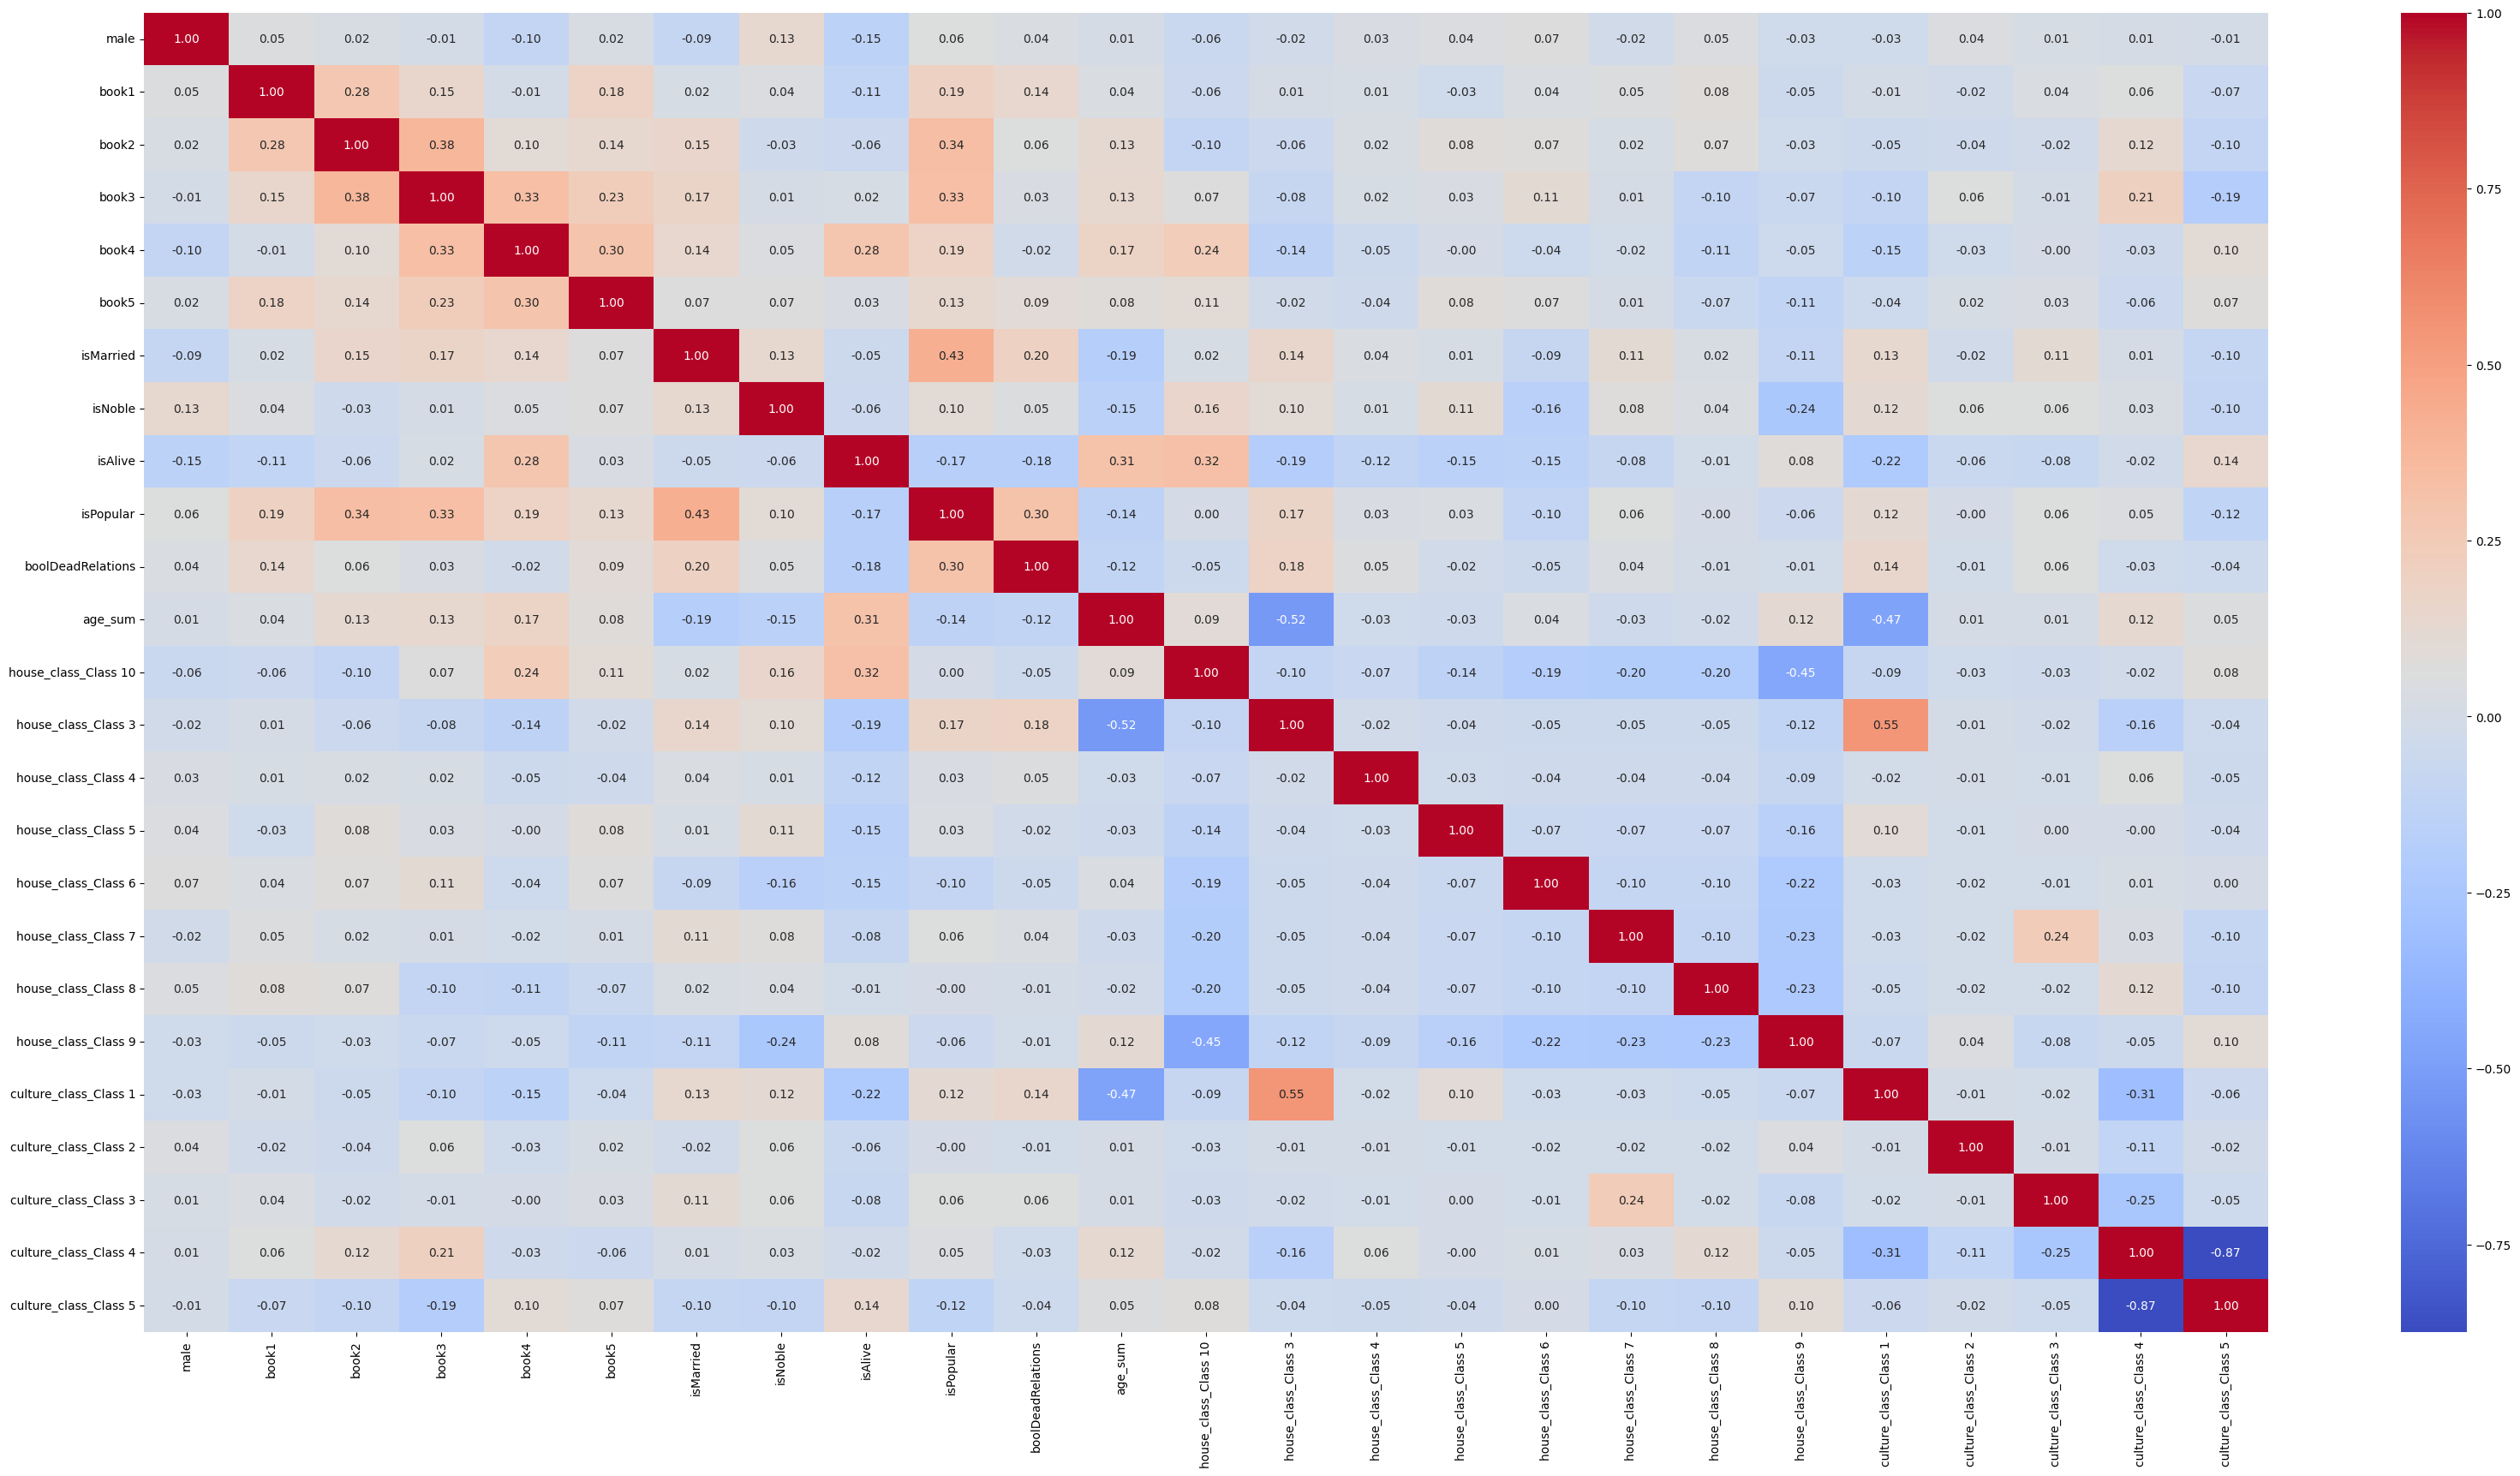

In [ ]:
# Матрица корреляцию между числовыми признаками
correlation_matrix = df.corr()

# Визуализируем корреляцию
plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = df.drop(columns=['isAlive']).values
y = df['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Модель логистической регрессии
# model = LogisticRegression()
# model =LogisticRegression(C=1)
model = LogisticRegression(max_iter=2000)

# Обучаем модель на тренировочных данных
model.fit(X_train, y_train)
# model.fit(X_train_scaled, y_train)
# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


# # Кросс-валидация (например, 5 фолдов)
# cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
# print(f'Average cross-validation accuracy: {cv_scores.mean():.4f}')

Accuracy: 0.8494


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Создание и обучение модели
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)  # Обучаем модель на тренировочных данных

# Оценка точности на тренировочных данных
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Оценка точности на тестовых данных
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training accuracy: {train_accuracy:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')


Training accuracy: 0.8715
Test accuracy: 0.8494


In [ ]:
# Создаем модель случайного леса
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучаем модель
model_rf.fit(X_train, y_train)

# Делаем предсказания
y_pred_rf = model_rf.predict(X_test)

# Оцениваем точность
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'RandomForestClassifier Accuracy: {accuracy_rf:.4f}')

RandomForestClassifier Accuracy: 0.8558


In [ ]:
# Создаем модель AdaBoost
model_ab = AdaBoostClassifier(n_estimators=50, random_state=42)

# Обучаем модель
model_ab.fit(X_train, y_train)

# Делаем предсказания
y_pred_ab = model_ab.predict(X_test)

# Оцениваем точность
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print(f'AdaBoostClassifier Accuracy: {accuracy_ab:.4f}')

AdaBoostClassifier Accuracy: 0.8333


In [ ]:
# Создаем модель для гауссовского процесса
model_gp = GaussianProcessClassifier(random_state=42)

# Обучаем модель
model_gp.fit(X_train, y_train)

# Делаем предсказания
y_pred_gp = model_gp.predict(X_test)

# Оцениваем точность
accuracy_gp = accuracy_score(y_test, y_pred_gp)
print(f'GaussianProcessClassifier Accuracy: {accuracy_gp:.4f}')

GaussianProcessClassifier Accuracy: 0.8590


In [ ]:
# Создаем модель наивного байесовского классификатора
model_gnb = GaussianNB()

# Обучаем модель
model_gnb.fit(X_train, y_train)

# Делаем предсказания
y_pred_gnb = model_gnb.predict(X_test)

# Оцениваем точность
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f'GaussianNB Accuracy: {accuracy_gnb:.4f}')

GaussianNB Accuracy: 0.7821


In [ ]:
# Создаем модель ближайших соседей
model_knn = KNeighborsClassifier(n_neighbors=5)

# Обучаем модель
model_knn.fit(X_train, y_train)

# Делаем предсказания
y_pred_knn = model_knn.predict(X_test)

# Оцениваем точность
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNeighborsClassifier Accuracy: {accuracy_knn:.4f}')

KNeighborsClassifier Accuracy: 0.8429


In [ ]:
# Создаем модель опорных векторов
model_svc = SVC(kernel='linear', random_state=42)

# Обучаем модель
model_svc.fit(X_train, y_train)

# Делаем предсказания
y_pred_svc = model_svc.predict(X_test)

# Оцениваем точность
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'SVC Accuracy: {accuracy_svc:.4f}')

SVC Accuracy: 0.8365


In [ ]:
# Создаем модель дерева решений
model_dt = DecisionTreeClassifier(random_state=42)

# Обучаем модель
model_dt.fit(X_train, y_train)

# Делаем предсказания
y_pred_dt = model_dt.predict(X_test)

# Оцениваем точность
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'DecisionTreeClassifier Accuracy: {accuracy_dt:.4f}')

DecisionTreeClassifier Accuracy: 0.8462


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
#  Уже сделано

# # Шаг 3. Предсказание на тестовых данных
# y_pred = logistic_regression.predict(X_test)

# # Шаг 4. Оценка предсказания по метрике accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
#  Уже сделано


# # Шаг 3. Предсказание на тестовых данных

# # Шаг 4. Оценка предсказания по метрике accuracy

# print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.4MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
# submission.to_csv("/content/new_submission.csv", index=False)

In [ ]:
test_df = pd.read_csv("/content/game_of_thrones_test.csv")

In [ ]:
test_df["isPopular"] = (test_df["popularity"] >= test_df["popularity"].quantile(0.75)).astype(int)
test_df.drop(columns=['popularity'], inplace=True)

In [ ]:
test_df["boolDeadRelations"] = (test_df["numDeadRelations"] > 0).astype(int)
test_df.drop(columns=['numDeadRelations'], inplace=True)

In [ ]:
# Заполняем пустые dateOfBirth - медианным значением
test_df['dateOfBirth'] = test_df['dateOfBirth'].fillna(median_dateOfBirth)

# # Заполняем пустые age
test_df.loc[(test_df['age'].isna()), 'age'] = median_age

# test_df.loc[(test_df['male'] == 1) & (test_df['isNoble'] == 1) & (test_df['age'].isna()), 'age'] = median_male_noble
# test_df.loc[(test_df['male'] == 1) & (test_df['isNoble'] == 0) & (test_df['age'].isna()), 'age'] = median_male_non_noble
# test_df.loc[(test_df['male'] == 0) & (test_df['isNoble'] == 1) & (test_df['age'].isna()), 'age'] = median_female_noble
# test_df.loc[(test_df['male'] == 0) & (test_df['isNoble'] == 0) & (test_df['age'].isna()), 'age'] = median_female_non_noble

# Суммируем значения dateOfBirth + age
test_df["age_sum"] = test_df["dateOfBirth"] + test_df["age"]

# Создаем категорийный(бинарный) признак 305
# test_df['age_305'] = (test_df['age_sum'] >= 305).astype(int)

# Удаляем ненужные
test_df.drop(columns=['age'], inplace=True)
test_df.drop(columns=['dateOfBirth'], inplace=True)

In [ ]:
# house

# Создаем колонку new_house и копируем значения из house
test_df['new_house'] = test_df['house']

# Удаляем "House" и пробелы с обеих сторон
test_df['new_house'] = test_df['new_house'].str.replace(r'^House\s+', '', regex=True).str.strip()

# # Заполняем по фамилии
# def fill_house_from_name(row, unique_houses):
#     if pd.isna(row['new_house']) and pd.notna(row['name']):
#         name_parts = row['name'].split()
#         if len(name_parts) > 1:
#             house_name = name_parts[-1]  # Вторая часть имени - название дома
#             # Проверяем, если это название дома уже есть среди уникальных значений new_house
#             if house_name in unique_houses:
#                 return house_name
#
#     return row['new_house']
#
# test_df['new_house'] = test_df.apply(lambda row: fill_house_from_name(row, unique_houses), axis=1)

# Удаляем
test_df.drop(columns=['house'], inplace=True)

# Заполняем NaN
test_df['new_house'].fillna('Unknown', inplace=True)



# Шаг 1: Применяем классификацию домов к test_df
test_df['house_class'] = test_df['new_house'].map(house_class_map)
# Шаг 2: Кодируем классы (One-Hot Encoding), используя те же классы, что в тренировочном df
test_df = pd.get_dummies(test_df, columns=['house_class'], drop_first=True)
# Шаг 3: Удаляем колонку new_house, если она больше не нужна
test_df.drop(columns=['new_house'], inplace=True)


<ipython-input-214-27b55ee77c27>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['new_house'].fillna('Unknown', inplace=True)


In [ ]:
# culture

# Шаг 1: Применяем "сворачивание" классов культуры к тестовому набору
test_df["new_culture"] = test_df["culture"].apply(map_culture)
# Шаг 2: Удаляем оригинальную колонку "culture"
test_df.drop(columns=['culture'], inplace=True)
# Шаг 3: Заполняем пустые значения
test_df['new_culture'].fillna('Unknown', inplace=True)
# Шаг 4: Применяем классификацию культур из тренировочного набора
test_df['culture_class'] = test_df['new_culture'].map(culture_class_map)
# Шаг 5: Кодируем классы культур (One-Hot Encoding)
test_df = pd.get_dummies(test_df, columns=['culture_class'])
# Шаг 6: Удаляем колонку new_culture, если она больше не нужна
test_df.drop(columns=['new_culture'], inplace=True)



<ipython-input-215-11cf02a96129>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['new_culture'].fillna('Unknown', inplace=True)


In [ ]:
# Контролируем состав колонок(иногда какой-то из классов может отсутствовать на данной выборке, поэтому создаем такие и заполняем их нулями)
expected_columns = [f'culture_class_Class {i+1}' for i in range(5)]
# Добавляем недостающие колонки в test_df и заполняем их нулями
for col in expected_columns:
    if col not in test_df.columns:
        test_df[col] = 0  # Заполняем 0, так как One-Hot Encoding использует 0 и 1

test_df['culture_class_Class 2'] = test_df['culture_class_Class 2'].astype(bool)

In [ ]:
# title

test_df.drop(columns=['title'], inplace=True)

In [ ]:
test_df.drop(columns=['spouse'], inplace=True)
test_df.drop(columns=['S.No'], inplace=True)
test_df.drop(columns=['name'], inplace=True)
test_df.drop(columns=['mother'], inplace=True)
test_df.drop(columns=['father'], inplace=True)
test_df.drop(columns=['heir'], inplace=True)

In [ ]:
test_df.drop(columns=['isAliveMother'], inplace=True)
test_df.drop(columns=['isAliveFather'], inplace=True)
test_df.drop(columns=['isAliveHeir'], inplace=True)
test_df.drop(columns=['isAliveSpouse'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   male                   1557 non-null   int64  
 1   book1                  1557 non-null   int64  
 2   book2                  1557 non-null   int64  
 3   book3                  1557 non-null   int64  
 4   book4                  1557 non-null   int64  
 5   book5                  1557 non-null   int64  
 6   isMarried              1557 non-null   int64  
 7   isNoble                1557 non-null   int64  
 8   isAlive                1557 non-null   int64  
 9   isPopular              1557 non-null   int64  
 10  boolDeadRelations      1557 non-null   int64  
 11  age_sum                1557 non-null   float64
 12  house_class_Class 10   1557 non-null   bool   
 13  house_class_Class 3    1557 non-null   bool   
 14  house_class_Class 4    1557 non-null   bool   
 15  hous

In [ ]:
#  Применяем модель

# Делаем предсказания на тестовом наборе
X_test = test_df.drop(columns=['isAlive'], errors='ignore').values  # Признаки из тестового набора
# y_pred = model.predict(X_test)
# y_pred = model_rf.predict(X_test)
# y_pred = model_ab.predict(X_test)
y_pred = model_gp.predict(X_test)
# y_pred = model_gnb.predict(X_test)
# y_pred = model_knn.predict(X_test)
# y_pred = model_svc.predict(X_test)
# y_pred = model_dt.predict(X_test)

# Добавляем предсказания в test_df
test_df["isAlive"] = y_pred

# Проверяем результат
print(test_df[["isAlive"]].head())

   isAlive
0        0
1        1
2        1
3        1
4        0


In [ ]:
test_df.head(20)

In [ ]:
# Проверяем, что количество строк совпадает
if len(submission) == len(test_df):
    submission['isAlive'] = test_df['isAlive'].values
    submission.to_csv('/content/submission.csv') #
else:
    print("Количество строк в submission.csv и test_df не совпадает.")

In [ ]:
# В итоге на Степике получилась метрика: 0.8149100257069408